<a href="https://colab.research.google.com/github/pebehv/Deep-Learning/blob/master/DL25_Tarea1_suplementario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><center><img src="https://ml.ucv.ai/logo.png\" width=150"/> </center></div>

# Tarea 1 - Material suplementario

## Tópicos en Inteligencia Artificial


* Alumno: Pebelin Hernandez
* Cédula: 25129892
----


Justificar **todas** sus respuestas.

Si utilizó una referencia, coloque link (de ser online) o nombre de trabajo, autor/es y página (de ser una referencia escrita de libro o paper).
- De ser para la sección teórica, debe reescribir o parafrasear con sus propias palabras la sección que desea usar y porqué la usó en la pregunta.
- De ser para la sección práctica, comente lo más posible el código usado de un tercero.



# Preguntas teóricas

##link de mi repo con los Notebook

https://github.com/pebehv/Deep-Learning/tree/master/Notebooks

## 1.1

Considere el siguiente código escrito en PyTorch

In [1]:
import torch
import torch.nn as nn


class ModeloSimple(nn.Module):
    def __init__(
        self,
        z,
        w,
        y
    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=y,
            out_features=z
        )
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(
            in_features=z,
            out_features=w
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [2]:
import torch
import torch.nn as nn

class ModeloSimple(nn.Module):
    def __init__(
        self,
        input_size,#entrada
        output_size,#salida
        hidden_size,#capa oculta
        activation_function='tanh'
    ):
        super(ModeloSimple, self).__init__()

        # Capa de entrada a la capa oculta
        self.fc1 = nn.Linear(
            in_features=input_size,
            out_features=hidden_size
        )

        # función de activación
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        else:
            raise ValueError("Función de activación no soportada. Elige entre 'relu' o 'tanh'.")

        # Capa oculta a la capa de salida
        self.fc2 = nn.Linear(
            in_features=hidden_size,
            out_features=output_size
        )

    def forward(self, x):
        # Flujo de datos a través del modelo
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [3]:
# Crea otra instancia del modelo usando Tanh como función de activación.
modelo_tanh = ModeloSimple(input_size=100, hidden_size=50, output_size=10, activation_function='tanh')

print(modelo_tanh)

ModeloSimple(
  (fc1): Linear(in_features=100, out_features=50, bias=True)
  (activation): Tanh()
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


Modifique el código y substituya las variables y, w, y z por las variables de entrada, salida y capas ocultas. Además, agregue la opción de usar como función de activación además de la presentada la tangente hiperbólica.

### 1.2.b Respuesta

SELECCIONE LA O LAS OPCIONES Y JUSTIFIQUE SU RESPUESTA

## 1.2

Supongamos que modificamos la función de activación $f_i$ en las neuronas de la capa oculta de una red neuronal a la siguiente expresión:

$$f_i(x, y) = a_i x + b_i y + c_i \text{ con } i \in \{1,2, 3\}$$

La estructura de la red tiene 2 capas de entrada 1 capa oculta con 3 neuronas y 1 salida.

1. Escriba el diagrama de la red.
1. Qué particularidad tiene la función resultante?

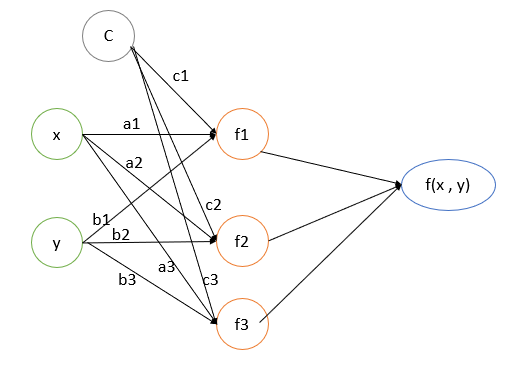

Qué particularidad tiene la función resultante?




> Añadir blockquote



## Pregunta 2 de evaluaciones

Considere la siguiente superficie $$
f(x, y)=\frac{\sin \left(0.8 \left(x^2+y^2\right)\right)}{\left(x^2+y^2\right)^{0.9}}
$$

In [4]:
import matplotlib.pyplot as plt
import torch
import matplotlib.cm as cm
import copy
import time

### Implemente la función usando `torch.sin` disponible en [PyTorch - Sin](https://pytorch.org/docs/stable/generated/torch.sin.html)




In [5]:
def f(x, y):
    resul = torch.sin(0.8*(x**2+y**2))/((x**2+y**2)**0.9)
    return resul

### Parámetros de generación de datos

In [6]:
ruido = 0
mesh_dim = 40

### Funciones para generar los datos

In [7]:
def datos(ruido, mesh_dim):
  t = torch.linspace(-3, 3, mesh_dim)
  x, y = torch.meshgrid(t, t)
  z = f(x, y)
  z_noisy = z + ruido * torch.randn(mesh_dim, mesh_dim)

  return x, y, z, z_noisy

def dataset(x, y, z, z_noisy):
  x_train = torch.vstack([x.ravel(), y.ravel()]).T
  y_train = z_noisy.ravel()
  y_test = z.ravel()

  return x_train, y_train, y_test

def plot_surface(x, y, z_noisy):
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot_surface(x, y, z_noisy,cmap='viridis', edgecolor='none')
  ax.set_title('Superficie')
  plt.show()


In [8]:
x, y, z, z_ruido = datos(ruido, mesh_dim)

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


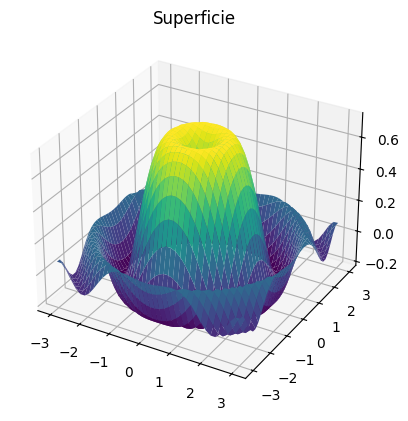

In [13]:
plot_surface(x, y, z_ruido)

In [10]:
x_train, y_train, y_test = dataset(x, y, z, z_ruido)

### Definiendo el modelo

La siguiente clase intenta definir una arquitectura de red neuronal que debe aproximar a $f(x, y)$. Identifique las dimensiones (entrada, salida) de la red sin importar la arquitectura.

Respuesta: La red tendria dos entradas : *x* y  *y*. tendria una salida (*x*, *y*)




Se provee la estructura principal de la clase debe crear la arquitectura en el método `__init__` de tal manera de que tenga 3 capas lineales con dimensiones de entrada `neuronas_l1`, `neuronas_l2` y `neuronas_l3`. La función de activación debe ser la `ReLU` para todas las capas.

In [14]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [21]:
class Net3L(nn.Module):
    def __init__(self, neuronas_l1=10, neuronas_l2=10, neuronas_l3=10):
        super(Net3L, self).__init__()
        ##############################################
        nn.Sequential(
            # 1ra capa lineal, con dos entradas x y y
            nn.Linear(in_features=2, out_features=neuronas_l1),
            nn.ReLU(),
            # 2da capa lineal
            nn.Linear(in_features=neuronas_l1, out_features=neuronas_l2),
            nn.ReLU(),
            # 3ra capa lineal
            nn.Linear(in_features=neuronas_l2, out_features=neuronas_l3),
            nn.ReLU(),
            # Capa de salida
            nn.Linear(in_features=neuronas_l3, out_features=1)
        )
        ##############################################
        self.linear_relu_stack = nn.Sequential
        ##############################################
    def forward(self, x):
        return self.linear_relu_stack(x)

    def fit(self, x_train, y_train, optimizer, batch_size, n_epochs_max):
        # Crear el TensorDataset
        train_data = TensorDataset(x_train, y_train)

        # Crear el Data Loader
        train_loader = DataLoader(
            dataset=train_data, # 3
            batch_size=batch_size,
            shuffle= True # 4
        )

        # Creando el loop de entrenamiento
        loss_list = []
        for n_epochs in range(n_epochs_max):
            for x_batch, y_batch in train_loader:
                def closure():
                    optimizer.zero_grad()
                    output = None # 5
                    loss = nn.MSELoss()(output.squeeze(-1), y_batch)
                    loss.backward()
                    return loss
                loss = optimizer.step(closure)
            loss_list.append(loss.item())
        return loss_list

    def evaluate(self, x_test, y_test):
      y_pred = self(x_test).squeeze(-1)
      return (nn.MSELoss()(y_pred, y_test)).item()

### Entrenamiento

Modifique la entrada para que la capa lineal 1 tenga 60 neuronas, la 2 30 neuronas y la 3 20 neuronas.

In [24]:
net = Net3L(60, 30, 20)


Modifique los valores en None

In [25]:
loss_list = net.fit(
    x_train, y_train,
    torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'),
    1600, 2000
)

### Evaluación

Explique detalladamente la funcionalidad del siguiente gráfico y de nombre a los ejes

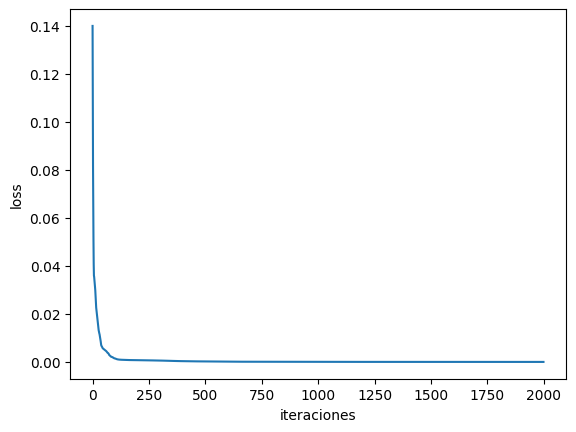

In [28]:
plt.figure()
plt.xlabel('iteraciones')
plt.ylabel('loss')
plt.plot(loss_list)
plt.show()

Para este caso, la grafica nos dice que el modelo esta aprendiendo, ya que la perdida disminuye .

Con cada época, los pesos y sesgos de la red se ajustan para que las predicciones del modelo se acerquen más a los valores reales de la función f(x,y).

### Predicción

In [29]:
y_pred = net(x_train).detach().squeeze(-1)

In [30]:
def plot_result(x, y, z1, z2):
  fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
  #
  ax[0].plot_trisurf(x, y, z1, vmin=y_train.min(), cmap=cm.viridis)
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('y')
  ax[0].set_zlabel('z')
  ax[0].set_title('Superficie')
  #
  ax[1].plot_trisurf(x, y, (z1-z2)**2, vmin=0, cmap=cm.viridis)
  ax[1].set_xlabel('x')
  ax[1].set_ylabel('y')
  ax[1].set_zlabel('z')
  ax[1].set_title('Residuales cuadrados')
  plt.show()

Modifique la llamada de la siguiente función de tal manera que el primer gráfico muestre la superficie luego de la predicción y la segunda superfice la diferencia cuadrática entre predicciones y valores reales

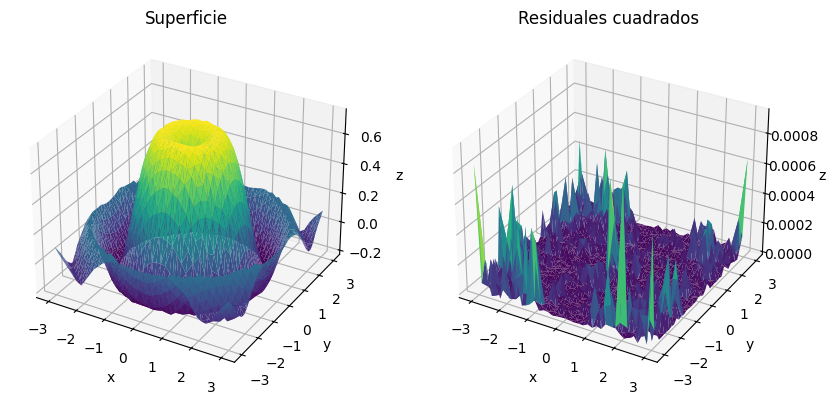

In [32]:
plot_result(x_train[:, 0], x_train[:, 1], y_pred, y_test)

Finalmente, modifique el código para obtener el  error de entrenamiento y el error de prueba. Compare los valores.

In [33]:
print('Error entrenamiento:', net.evaluate(x_train, y_train))
print('Error de prueba:', net.evaluate(x_train, y_test))

Error entrenamiento: 4.363679181551561e-05
Error de prueba: 4.363679181551561e-05


### Analizando distintos optimizers

El siguiente segmento de código tarda alrededor de 5 minutos por cada ejecución. Su objetivo es investigar las diferencias entre los 3 optimizadores utilizados y responder las siguientes preguntas:

1. Cuál es el impacto del parámetro `ruido` en el proceso de optimización?
1. Cómo se diferencia el método del descenso del gradiente con el descenso estocástico y las versiones aceleradas?
1. Cómo impacta la dimensión de la red neuronal en el rendimiento del optimizador?
1. Intente analizar la diferencia entre épocas y el tiempo de convergencia de los algoritmos.

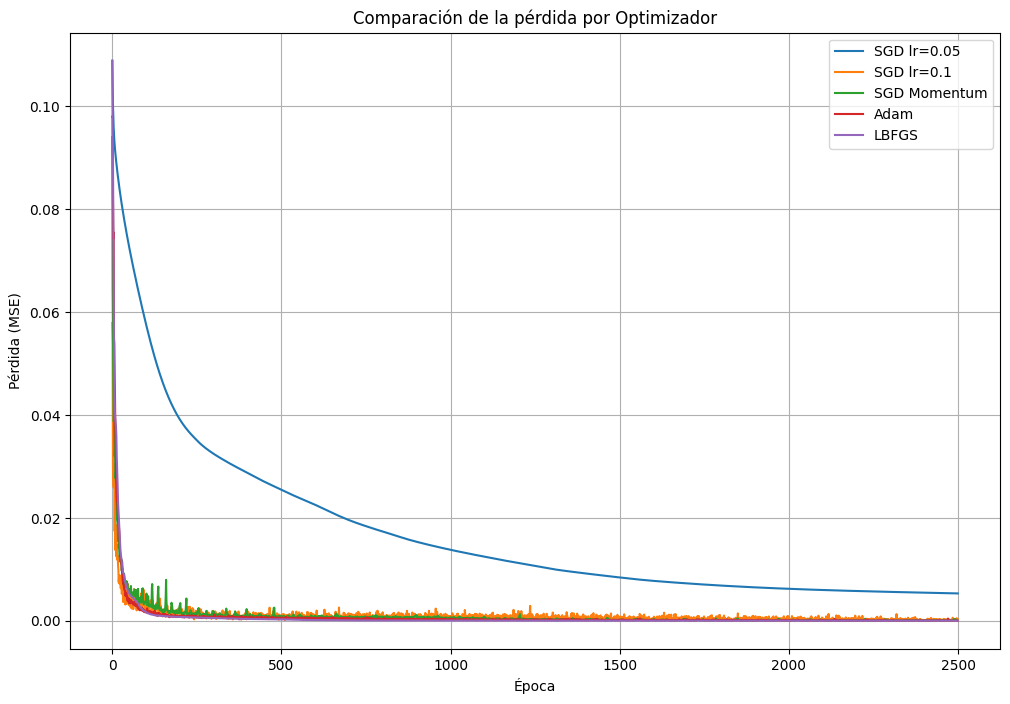

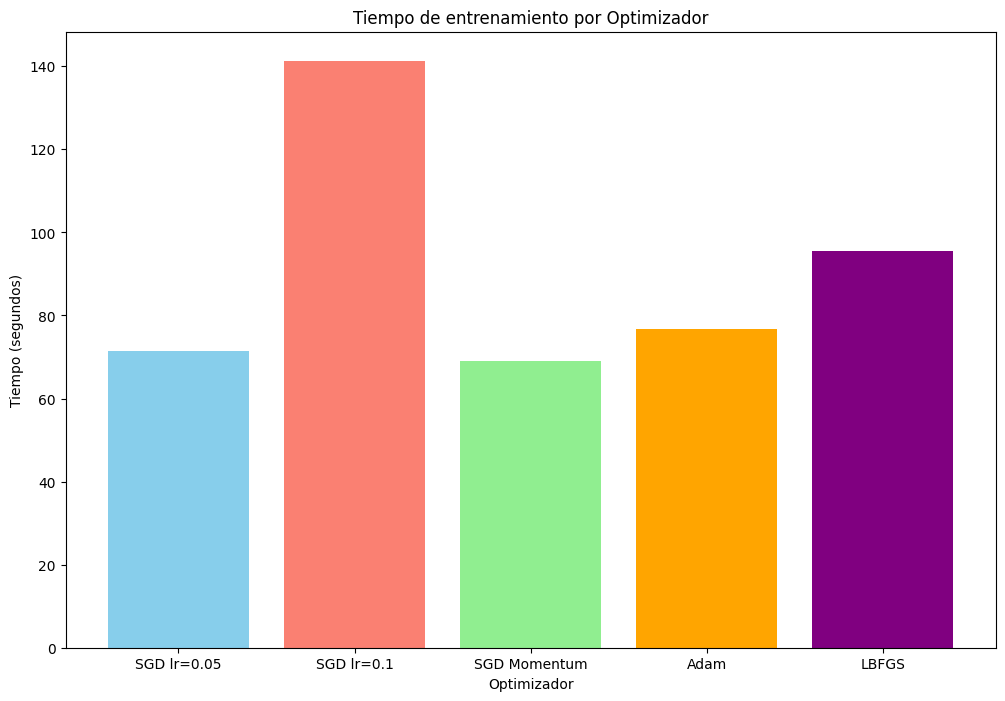

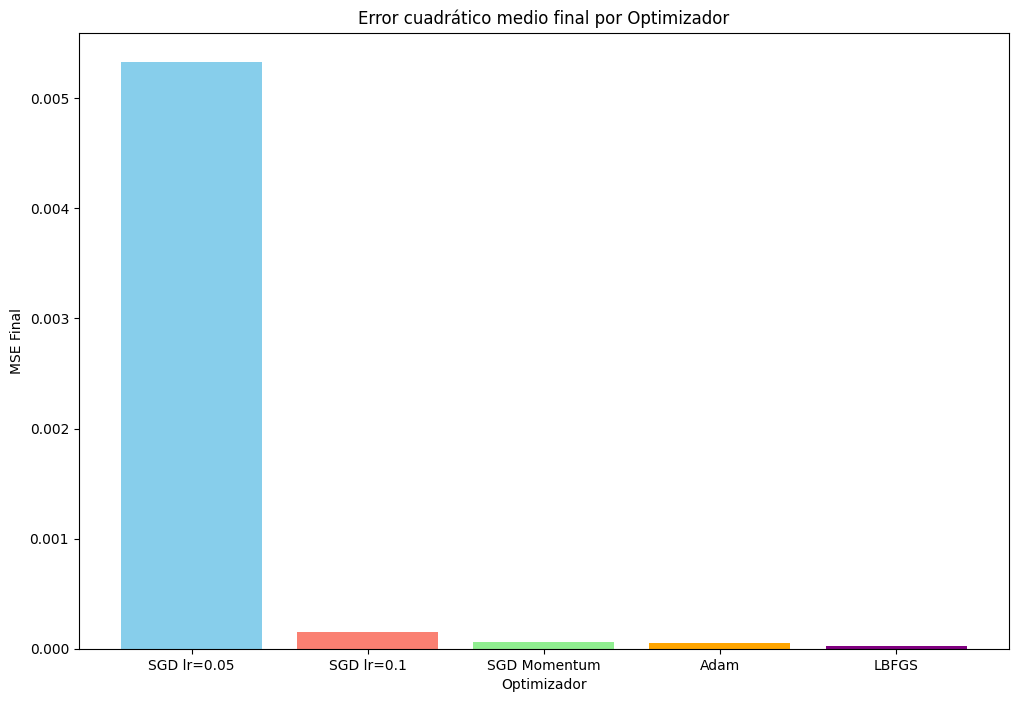

In [35]:
# Crear la red con numero de neuronas idéntico para cada capa
net = Net3L(50, 50, 50)

# Creamos una copia de la red de tal manera de que compartan la misma inicialización
net_list = [copy.deepcopy(net) for i in range(5)]

# Modifique a conveniencia el número de épocas para responder sus preguntas.
n_epochs = 2500
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []


for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))



# Definir las etiquetas para la leyenda del gráfico
labels = ['SGD lr=0.05', 'SGD lr=0.1', 'SGD Momentum', 'Adam', 'LBFGS']
# Crear el gráfico
plt.figure(figsize=(12, 8))
# Iterar sobre la lista de pérdidas y graficar cada una
for i, loss_list in enumerate(loss_meta_list):
    plt.plot(loss_list, label=labels[i])

plt.title('Comparación de la pérdida por Optimizador')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Opcional: Gráfico de barras para comparar el tiempo de entrenamiento
plt.figure(figsize=(12, 8))
plt.bar(labels, times_list, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])
plt.title('Tiempo de entrenamiento por Optimizador')
plt.xlabel('Optimizador')
plt.ylabel('Tiempo (segundos)')
plt.show()

# Opcional: Gráfico de barras para comparar el error final
plt.figure(figsize=(12, 8))
plt.bar(labels, eval_list, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])
plt.title('Error cuadrático medio final por Optimizador')
plt.xlabel('Optimizador')
plt.ylabel('MSE Final')
plt.show()

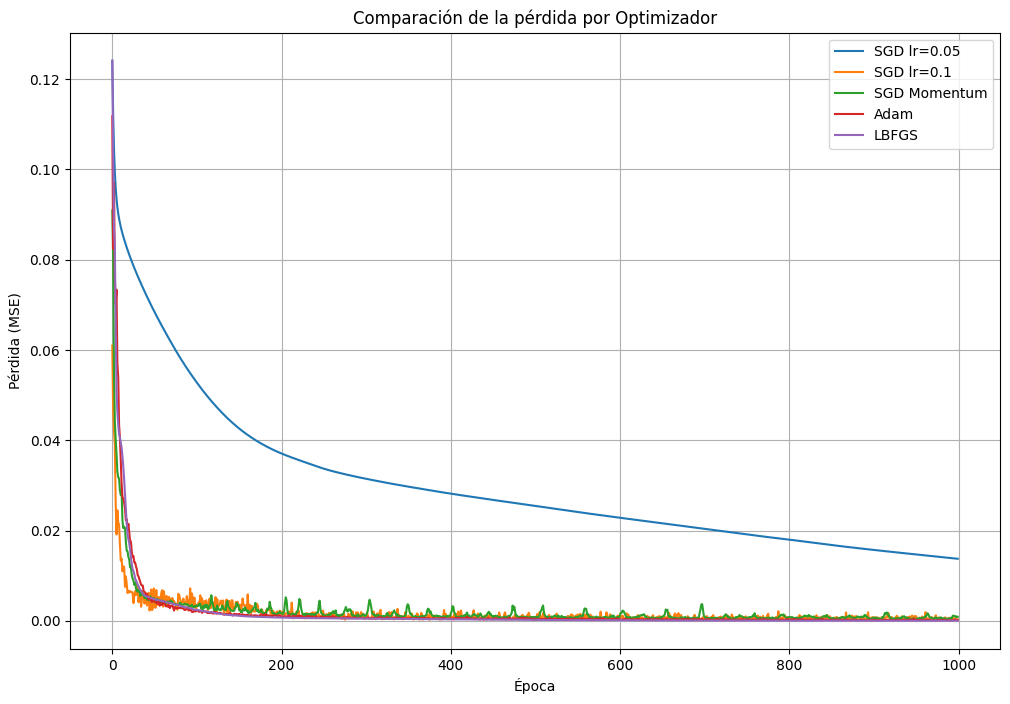

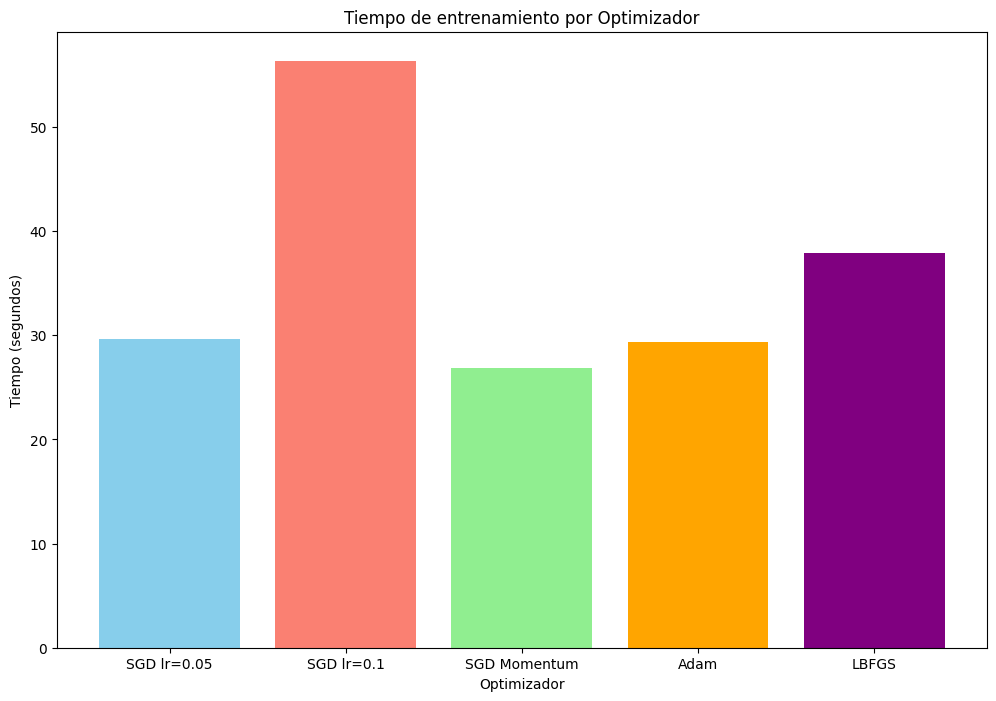

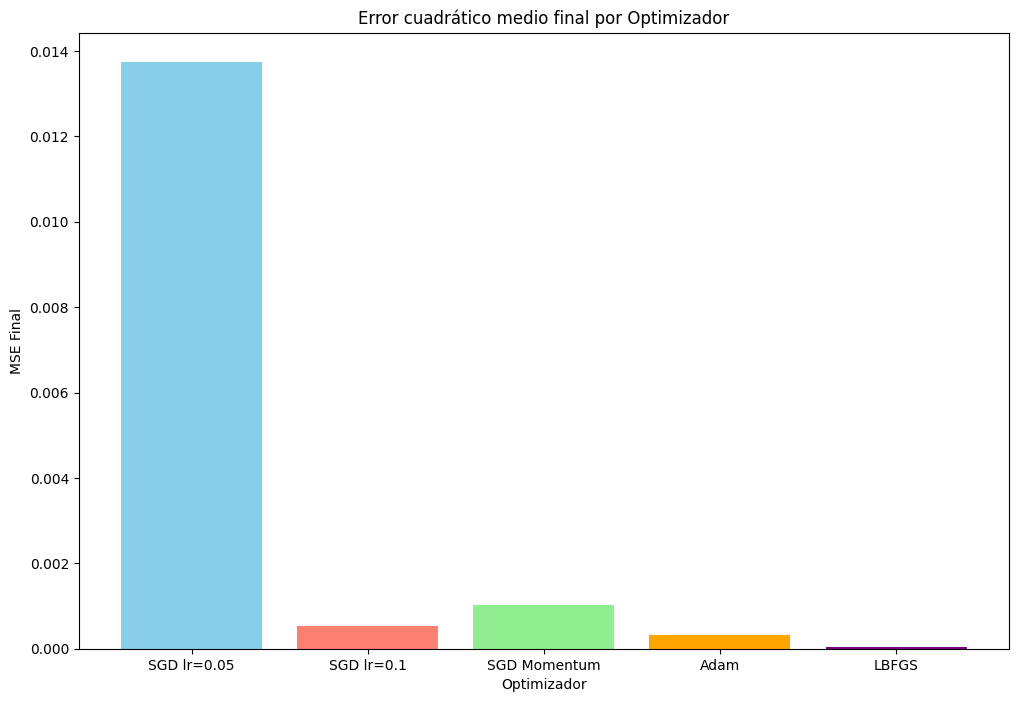

In [36]:
# Crear la red con numero de neuronas idéntico para cada capa
net = Net3L(50, 50, 50)

# Creamos una copia de la red de tal manera de que compartan la misma inicialización
net_list = [copy.deepcopy(net) for i in range(5)]

# Modifique a conveniencia el número de épocas para responder sus preguntas.
n_epochs = 1000
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []


for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))



# Definir las etiquetas para la leyenda del gráfico
labels = ['SGD lr=0.05', 'SGD lr=0.1', 'SGD Momentum', 'Adam', 'LBFGS']
# Crear el gráfico
plt.figure(figsize=(12, 8))
# Iterar sobre la lista de pérdidas y graficar cada una
for i, loss_list in enumerate(loss_meta_list):
    plt.plot(loss_list, label=labels[i])

plt.title('Comparación de la pérdida por Optimizador')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Opcional: Gráfico de barras para comparar el tiempo de entrenamiento
plt.figure(figsize=(12, 8))
plt.bar(labels, times_list, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])
plt.title('Tiempo de entrenamiento por Optimizador')
plt.xlabel('Optimizador')
plt.ylabel('Tiempo (segundos)')
plt.show()

# Opcional: Gráfico de barras para comparar el error final
plt.figure(figsize=(12, 8))
plt.bar(labels, eval_list, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])
plt.title('Error cuadrático medio final por Optimizador')
plt.xlabel('Optimizador')
plt.ylabel('MSE Final')
plt.show()

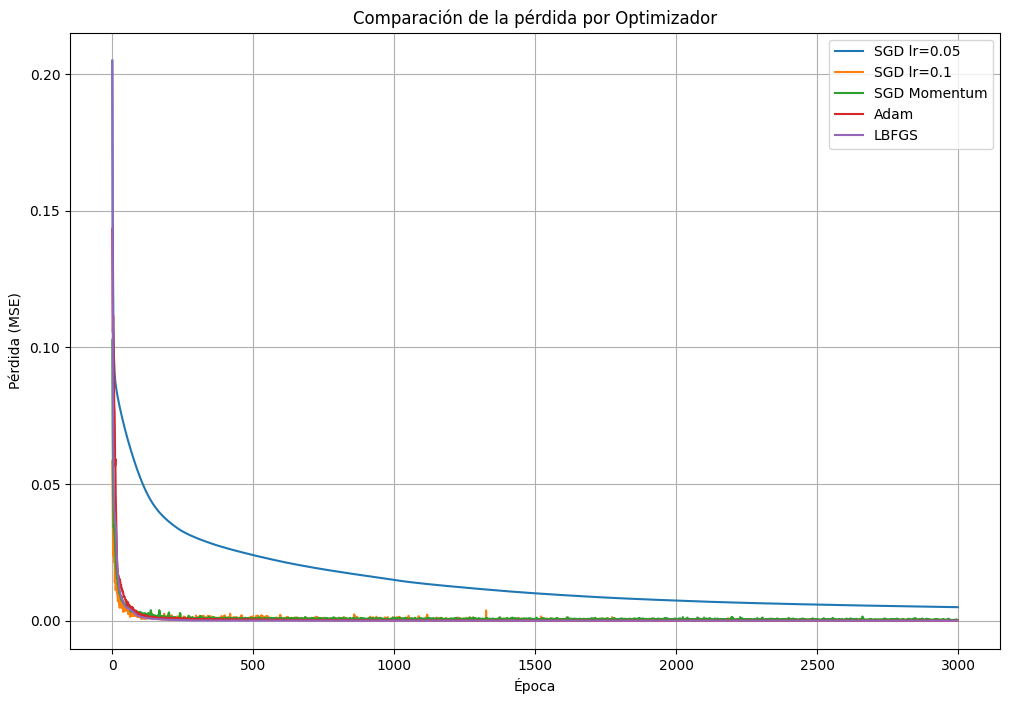

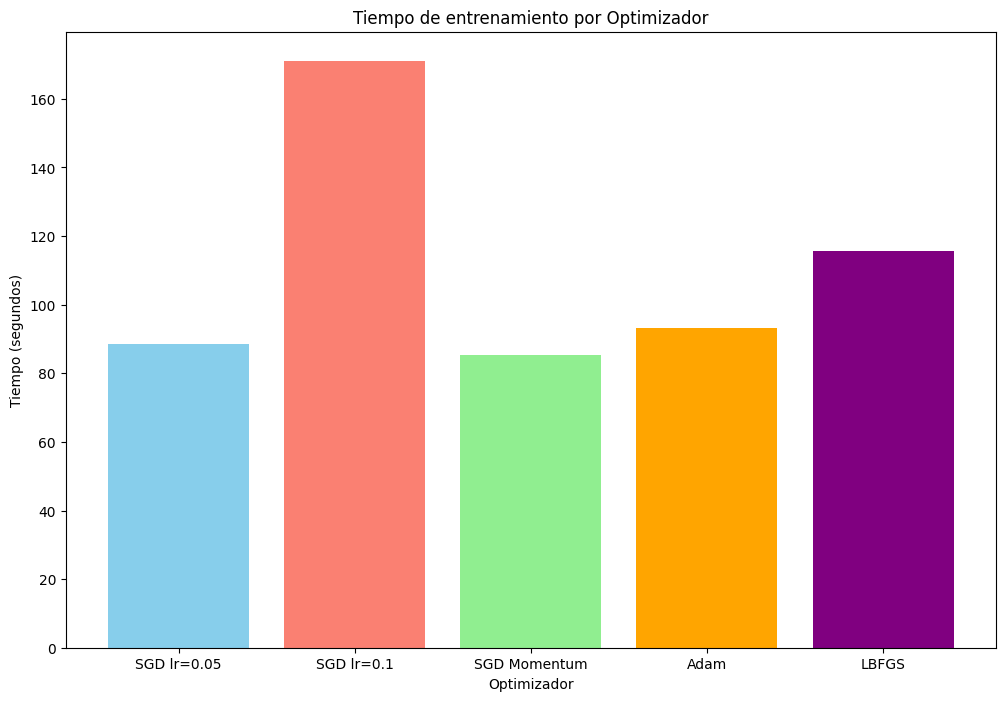

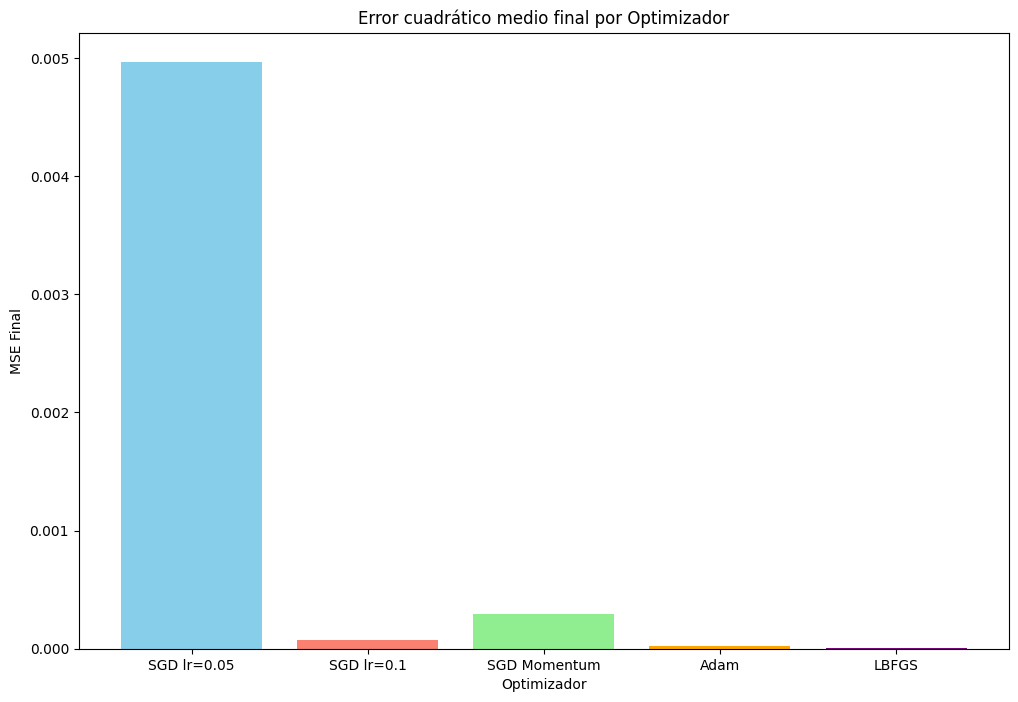

In [37]:
# Crear la red con numero de neuronas idéntico para cada capa
net = Net3L(50, 50, 50)

# Creamos una copia de la red de tal manera de que compartan la misma inicialización
net_list = [copy.deepcopy(net) for i in range(5)]

# Modifique a conveniencia el número de épocas para responder sus preguntas.
n_epochs = 3000
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []


for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))



# Definir las etiquetas para la leyenda del gráfico
labels = ['SGD lr=0.05', 'SGD lr=0.1', 'SGD Momentum', 'Adam', 'LBFGS']
# Crear el gráfico
plt.figure(figsize=(12, 8))
# Iterar sobre la lista de pérdidas y graficar cada una
for i, loss_list in enumerate(loss_meta_list):
    plt.plot(loss_list, label=labels[i])

plt.title('Comparación de la pérdida por Optimizador')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Opcional: Gráfico de barras para comparar el tiempo de entrenamiento
plt.figure(figsize=(12, 8))
plt.bar(labels, times_list, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])
plt.title('Tiempo de entrenamiento por Optimizador')
plt.xlabel('Optimizador')
plt.ylabel('Tiempo (segundos)')
plt.show()

# Opcional: Gráfico de barras para comparar el error final
plt.figure(figsize=(12, 8))
plt.bar(labels, eval_list, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])
plt.title('Error cuadrático medio final por Optimizador')
plt.xlabel('Optimizador')
plt.ylabel('MSE Final')
plt.show()

##Cuál es el impacto del parámetro ruido en el proceso de optimización?

Este ruido puede ayudar a escapar de mínimos locales, pero también puede dificultar la convergencia si no se controla.

**Para el caso de SGD lr= 0.05**: Tasa de aprendizaje moderada. Introduce ruido por mini-batches. El lr bajo suaviza el efecto del ruido.

**Para el caso de SGD lr= 0.1**: 	Tasa de aprendizaje alta.	Tasa de aprendizaje alta. Mayor sensibilidad al ruido. Puede oscilar más, pero también escapar de mínimos locales.

**Para el caso de Adam**: Usa momentos de primer y segundo orden. Maneja el ruido de forma inteligente, ajustando el lr por parámetro. Muy robusto frente a ruido.

**Para el caso de LBFGS**: Usa toda la información del gradiente, por lo que es muy sensible al ruido. Ideal para problemas bien definidos y datos limpios.

##Cómo se diferencia el método del descenso del gradiente con el descenso estocástico y las versiones aceleradas?

**Batch GD**: Este es el método más simple y conceptualmente directo.
Actualización: Usa todo el conjunto de datos para calcular el gradiente en cada paso.

Ventajas: Preciso y estable.

Desventajas: Muy lento en datasets grandes. Poco flexible ante ruido.

Ruido: Prácticamente nulo, pero puede quedar atrapado en mínimos locales.

**SGD**: Este método se creó para resolver los problemas de escalabilidad del Descenso de Gradiente.
Actualización: Usa una sola muestra aleatoria por paso.

Ventajas: Rápido, barato computacionalmente, puede escapar de mínimos locales.

Desventajas: Muy ruidoso, puede oscilar mucho.

Ruido: Alto, pero útil para exploración.

**Versiones Aceleradas (Momentum, Nesterov, Adam, etc.)** :
Estos optimizadores son mejoras sobre el Descenso Estocástico del Gradiente (o su versión mini-batch). En lugar de simplemente usar el gradiente actual para decidir el siguiente paso, incorporan información de los gradientes pasados.

**Momentum/Nesterov**: Usas impulso para no detenerte en cada piedra.

**Adam**: Tienes sensores que ajustan tu paso según el terreno.


##Cómo impacta la dimensión de la red neuronal en el rendimiento del optimizador?

Aumentar la dimensión de una red neuronal generalmente le da más poder para aprender patrones complejos, pero también complica el trabajo del optimizador. Las redes muy profundas pueden sufrir de inestabilidad en el gradiente, mientras que las redes muy anchas pueden requerir optimizadores más avanzados que puedan manejar eficientemente la gran cantidad de parámetros.

##Intente analizar la diferencia entre épocas y el tiempo de convergencia de los algoritmos.

Una época representa una pasada completa por todo el conjunto de datos de entrenamiento.

Observé que el número de épocas tiene un impacto directo en el tiempo de entrenamiento. Al aumentar las épocas por encima de 2500, el tiempo de ejecución del modelo se incrementó notablemente, confirmando que más épocas requieren más tiempo para completar el entrenamiento.